# **Analyzing Flight Price Predictions**

The goal is to analyze and predict flight prices based on
various factors such as airline, date of journey, source, destination, and other travel details. The inspiration for this project comes from the need to understand pricing patterns and evaluate the accuracy of a random forest model in predicting flight fares. Our job is to investigate the dataset and assess
the model's performance metrics.

# **Understanding the** **Datbase**

I have one dataset to go through:

FlightFare_Dataset.xlsx
- `FlightFare_Dataset.xlsx`


Let's go through it to see what I're dealing with:

# **Dataset Overview**

The dataset contains 10,001 entries with 11 columns, including:



*   **Airline:** The airline operating the flight (e.g., IndiGo, Air India, Jet Airways).
*   **Date_of_Journey:** The date of the flight (e.g., 24/03/2019).
*   **Source:** The departure city (e.g., Banglore, Kolkata, Delhi).
*   **Destination:** The arrival city (e.g., New Delhi, Cochin, Banglore).
*   **Route:** The flight route (e.g., BLR → DEL, CCU → IXR → BBI → BLR).
*   **Dep_Time:** Departure time (e.g., 22:20).
*   **Arrival_Time:** Arrival time (e.g., 01:10 22 Mar).
*  **Duration**: Flight duration (e.g., 2h 50m).
*   **Total_Stops:** Number of stops (e.g., non-stop, 1 stop, 2 stops).
*  **Additional_Info**: Additional information (e.g., No info, In-flight meal not included).
*   **Price:** The flight price in Indian Rupees (e.g., 3897).

# **Data Loading**
The first cell of the notebook imports the necessary libraries and loads the dataset:

In [194]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [195]:
#Loading dataset
df = pd.read_excel("FlightFare_Dataset.xlsx")

# **Data Preview**
Next, the notebook displays the first few rows of the dataset to understand its structure:

In [196]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
9996,Multiple carriers,27/06/2019,Delhi,Cochin,DEL → IDR → BOM → COK,15:05,01:30 28 Jun,10h 25m,2 stops,No info,15965
9997,Jet Airways,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,18:15,11h 45m,1 stop,In-flight meal not included,10844
9998,Air India,12/05/2019,Banglore,Delhi,BLR → DEL,13:20,16:10,2h 50m,non-stop,No info,6121
9999,IndiGo,24/04/2019,Banglore,Delhi,BLR → DEL,22:10,01:00 25 Apr,2h 50m,non-stop,No info,3625


# **Data Information**
The notebook then examines the dataset's structure and data types:

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB


# **Missing Values**
The notebook checks for missing values in the dataset:

In [198]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [199]:
df.dropna(inplace=True)

In [200]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


# **Data Summary**
* **Rows:** 10,001
* **Columns:** 11
* **Missing Values:** 1 missing value each in 'Route' and 'Total_Stops'.
* **Data Types:**Mostly object (string) types, with 'Price' as int64.
* **Price Range:** Minimum 1759, Maximum 79512, with a standard deviation of 4591.

# **Data Preprocessing**

**Extracting Date Components**

The notebook extracts day, month from the 'Date_of_Journey' column to use as features:

# **Feature Engineering**

In [201]:
# Date_of_Journey is the day when plane departs.
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [202]:
# Since I have converted Date_of_Journey column into integers, Now I can drop it
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# **Extracting Time Components**

Departure and arrival times are split into hours and minutes:

In [203]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey I can extract values from Dep_Time
# Extracting Hours
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"], format="%H:%M")

# Extract hour and minute
df["dep_hour"] = df["Dep_Time"].dt.hour
df["dep_min"] = df["Dep_Time"].dt.minute

# Drop the original column
df.drop(["Dep_Time"], axis=1, inplace=True)

In [204]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey I can extract values from Arrival_Time

# Extracting Hours
df["arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
# Extracting Minutes
df["arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
# Now I can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

<ipython-input-204-c08a19dbc5ef>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
<ipython-input-204-c08a19dbc5ef>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


In [205]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


# **Handling Duration**

The duration column is processed to separate hours and minutes:

In [206]:
# Fill missing hours or minutes in Duration column
df["Duration"] = df["Duration"].apply(lambda x: x if "h" in x and "m" in x
                                                 else x + " 0m" if "h" in x
                                                 else "0h " + x)

# Extract hours and minutes into new columns
df["Duration_hours"] = df["Duration"].apply(lambda x: int(x.split("h")[0]))
df["Duration_mins"] = df["Duration"].apply(lambda x: int(x.split("h")[1].strip(" m")))

# Drop the original Duration column
df.drop("Duration", axis=1, inplace=True)

df.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# **Handing Categorical Data**

In [207]:
# Feature engineering on: Airline
df["Airline"].value_counts()

,count
Airline,
Jet Airways,3598
IndiGo,1927
Air India,1633
Multiple carriers,1129
SpiceJet,769
Vistara,447
Air Asia,296
GoAir,179
Multiple carriers Premium economy,13


**Simplifying the Airline**\
To reduce the complexity and improve the performance of our model, I simplified the Airline feature by grouping less frequent airlines into a single category called "Other". This helps avoid overfitting and ensures the model focuses on the most relevant carriers.


* Popular Airlines (like Jet Airways, IndiGo, Air India, etc.) are retained as-is.

* Less frequent ones are grouped under the "Other" category.




In [208]:
# As Airline is Nominal Categorical data I will perform OneHotEncoding
Airline = df[["Airline"]]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
  if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

<ipython-input-208-4085278758f7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline'] = pd.DataFrame(New_Airline_List)


,count
Airline,
Jet Airways,3598
IndiGo,1927
Air India,1632
Multiple carriers,1129
SpiceJet,769
Vistara,447
Air Asia,296
GoAir,179
Other,22


After simplifying the Airline column, I applied one-hot encoding to convert the categorical airline names into a numerical format suitable for machine learning models.

In [209]:
Airline = pd.get_dummies(Airline, drop_first=True).astype(int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [210]:
#Feature engineering on : Source
df["Source"].value_counts()

,count
Source,
Delhi,4257
Kolkata,2678
Banglore,2058
Mumbai,647
Chennai,360


In [211]:
# As Source is Nominal Categorical data I will perform OneHotEncoding
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True).astype(int)
# drop_first= True means I drop the first column to prevent multicollinearity
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [212]:
# Feature engineering on: Total_Stops
df["Destination"].value_counts()

,count
Destination,
Cochin,4257
Banglore,2678
Delhi,1191
New Delhi,867
Hyderabad,647
Kolkata,360


# **Cleaning and Encoding the Destination Feature**
To ensure consistency between `Source` and `Destination` values, we replaced `New Delhi` with `Delhi` in the `Destination` column. This standardization helps avoid mismatches and redundant categories.

In [213]:
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = df[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data I will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True).astype(int)
Destination.head()

<ipython-input-213-7e7a8e33a760>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['Destination'] = pd.DataFrame(New_Destination_List)


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [214]:
# Route and Total_Stops are related to each other
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [215]:
# Feature engineering on: Total_Stops
df["Total_Stops"].value_counts()

,count
Total_Stops,
1 stop,5281
non-stop,3259
2 stops,1415
3 stops,44
4 stops,1


The Total_Stops column represents an ordinal categorical variable—the number of stops is ordered and meaningful (more stops generally mean longer travel time). To preserve this order, we used label encoding, mapping each category to a corresponding integer:

In [216]:
# # Encoding Total_Stops as ordinal numerical values
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.head()

<ipython-input-216-cff04375e7c5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


# **Final Feature Assembly**
After preprocessing the categorical features (Airline, Source, and Destination) using one-hot encoding, we combined them back with the main dataset. We also dropped the original columns to avoid duplication:

* `pd.concat(..., axis=1)` merges the encoded features with the main DataFrame column-wise.

* Dropping `Airline`, `Source`, and `Destination` ensures only the encoded versions remain.

At this point, `data_train` contains only **numerical features**, making it ready for model training.

In [217]:
#Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([df, Airline, Source, Destination], axis = 1)

# Drop original categorical columns as they are now encoded
data_train.drop(["Airline","Source","Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [218]:
data_train.shape

(10000, 26)

Feature Selection

## **Fit model - Random Forest**

Now that our dataset is cleaned and preprocessed, we separate it into:

* **X:** The set of independent variables (features) used to predict the output.

* **y:** The dependent variable (target), which in this case is the flight price.


In [219]:
#Defining X and Y
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y = data_train["Price"]

In [220]:
print(X.shape, y.shape)

(10000, 25) (10000,)


To understand which features are most influential in predicting flight prices, we used the ExtraTreesRegressor—an ensemble method that ranks features based on how useful they are during the decision-tree-based model training.

`Total_Stops`, `Journey_day`, `Duration_hours`, and `Jet Airways` are among the most important features for predicting flight prices.

In [221]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.22140771 0.14094563 0.06562743 0.02911244 0.02419964 0.03369507
 0.02415348 0.15177975 0.02080332 0.00879555 0.00139797 0.01071993
 0.1187623  0.01859726 0.02778825 0.00388016 0.0034456  0.00129366
 0.02612828 0.01262237 0.01555986 0.00694973 0.0267579  0.00394681
 0.00162992]


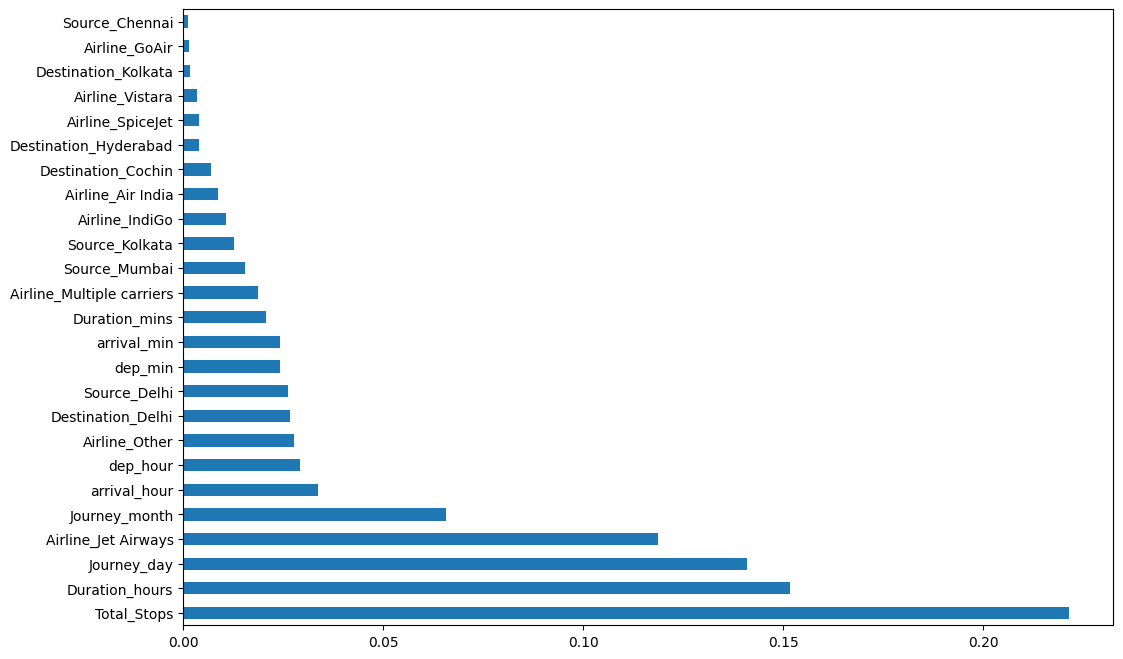

In [222]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

# **VIF (Variance Inflation Factor)** - **Multicollinearity**

To ensure that our features are not highly correlated with each other (i.e., to avoid multicollinearity), we used the Variance Inflation Factor (VIF). High multicollinearity can negatively affect model performance and interpretability.

* VIF > 10: High multicollinearity — consider dropping the feature.

* VIF between 5–10: Moderate multicollinearity — investigate further.

* VIF < 5: Generally safe.

In [223]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [224]:
# Compute VIF on X
calc_vif(X)

,variables,VIF
0,Total_Stops,7.533035
1,Journey_day,3.511805
2,Journey_month,16.470796
3,dep_hour,5.790951
4,dep_min,2.804206
5,arrival_hour,4.923106
6,arrival_min,3.455823
7,Duration_hours,6.183394
8,Duration_mins,4.106901
9,Airline_Air India,5.381726


After calculating Variance Inflation Factor (VIF) to detect multicollinearity, we found that `Source_Delhi` had a high VIF score. High multicollinearity can negatively impact model interpretation and performance, especially in linear models.

To address this, we removed `Source_Delhi` from the feature set

In [225]:
# Drop 'Source_Delhi'
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
X.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


# **Model training**

Before training a machine learning model, we split the dataset into two parts:

Training Set (`X_train`, `y_train`): Used to train the model.

Test Set (`X_test`, `y_test`): Used to evaluate how well the model performs on unseen data.

`test_size=0.2:` 20% of the data is used for testing, and 80% is used for training.

`random_state=42:` Ensures the split is reproducible across runs.

In [226]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

I use a Random Forest Regressor, an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.

In [227]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

# **Model Performance Evaluation**
I evaluate the Random Forest Regressor’s performance using the coefficient of determination, R² score, which indicates how well the model explains the variance in the target variable.

* R² score on Training Set: Measures how well the model fits the training data.

* R² score on Test Set: Indicates how well the model generalizes to unseen data.

* --> A score closer to 100% means better prediction.

* --> If the training score is much higher than the test score, it could indicate overfitting.

In [228]:
print('Model Performance on Training Set:', round(rf_reg.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(rf_reg.score(X_test, y_test)*100,2))

Model Performance on Training Set: 95.29
Model Performance on Test Set: 82.79


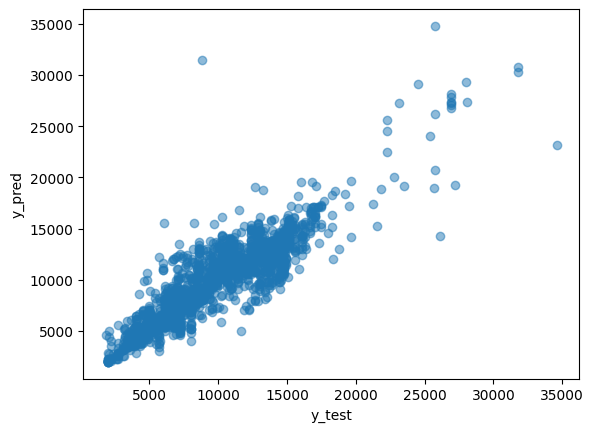

In [229]:
# Plot performance graph
y_pred = rf_reg.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [230]:
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 1181.2246138495948
MSE: 3418919.7790691643
RMSE: 1849.0321195342076
Normalized RMSE  0.06
Max Value:  79512 
Min Value:  1759


# **Saving the trained model**

In [231]:
import pickle
# open a file, where you ant to store the data
file = open('flight_training.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)

# **Prediction on Unseen data**

In [232]:
import pickle
path = 'c2_flight_rf.pkl'
model = open(path,'rb')
rf_model = pickle.load(model)

In [233]:
unseen_dataset = pd.read_excel("./Unseen_Dataset.xlsx")
unseen_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149


# **Feature Engineering on Unseen/Test Data**
We apply the same preprocessing steps to the new data as we did on training data:

* Extract day/month from `Date_of_Journey`.

* Extract hours/minutes from `Dep_Time` and `Arrival_Time`.

* Split Duration into `Duration_hours` and `Duration_mins`.

* Group rare airlines as `Other` and one-hot encode `Airline`, `Source`, and `Destination` (renaming `New Delhi` to `Delhi`).

* Drop unnecessary columns (`Route`, `Additional_Info`).

* Convert `Total_Stop`s from categorical to numeric.

* Combine all processed features into a final test dataset ready for prediction.

In [234]:
# Perform feature engineering on object dt variables
# Feature Engineering on: 'Date_of_Journey'
unseen_dataset["journey_day"] = pd.to_datetime(unseen_dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
unseen_dataset["journey_month"] = pd.to_datetime(unseen_dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
unseen_dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Feature Engineering on: 'Dep_Time'
unseen_dataset["dep_hour"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.hour
unseen_dataset["dep_min"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.minute
unseen_dataset.drop(["Dep_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Arrival_Time'
unseen_dataset["arrival_hour"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.hour
unseen_dataset["arrival_min"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.minute
unseen_dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Duration'
duration = list(unseen_dataset["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
unseen_dataset["Duration_hours"] = duration_hours
unseen_dataset["Duration_mins"] = duration_mins
unseen_dataset.drop(["Duration"], axis = 1, inplace = True)


# Perform feature engineering on Categorical dt variables
# Feature Engineering on: 'Airline'
Airline = unseen_dataset[["Airline"]]
New_Airline_List = []
Current_Airline_List = Airline['Airline']
for carrier in Current_Airline_List:
  if carrier in ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')
Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline = pd.get_dummies(Airline, drop_first= True)

# Feature Engineering on: 'Source'
Source = unseen_dataset[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

# Feature Engineering on: 'Destination'
Destination = unseen_dataset[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []
for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)
Destination['Destination'] = pd.DataFrame(New_Destination_List)
Destination['Destination'].value_counts()
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

# Feature Engineering on: 'Route', 'Additional_Info
unseen_dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Feature Engineering on: 'Total_Stops'
unseen_dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> train_data + Airline + Source + Destination
data_test = pd.concat([unseen_dataset, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

# See how the test dataset looks
data_test.head()

<ipython-input-234-e527394cc6e5>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unseen_dataset["dep_hour"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.hour
<ipython-input-234-e527394cc6e5>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unseen_dataset["dep_min"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.minute
<ipython-input-234-e527394cc6e5>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unseen_dataset["arrival_hour"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.hour
<ipython-input-234-e527394cc6e5>:14: UserWarning: Could not infer format, so each el

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,12898,27,5,7,5,19,0,11,55,...,False,False,False,True,False,False,True,False,False,False
1,1,10851,6,3,2,5,7,25,5,20,...,False,False,False,True,False,False,True,False,False,False
2,1,5704,21,3,9,45,23,0,13,15,...,False,False,False,True,False,False,True,False,False,False
3,0,11598,18,3,21,10,0,5,2,55,...,False,True,False,False,False,False,False,True,False,False
4,1,9149,27,5,8,30,19,15,10,45,...,False,False,False,True,False,False,True,False,False,False


# **Preparing Test Features for Prediction**
Rename columns (`journey_day` → `Journey_day`, `journey_month` → `Journey_month`) to match training data.

Select only the features used in training, excluding `Source_Delhi`.

Ensure the column order and names exactly match the training feature set for consistency.

Extract target column (`y_unseen`) if available for evaluation.

In [235]:
# Rename columns to match training feature names (case sensitive)
data_test = data_test.rename(columns={'journey_day': 'Journey_day', 'journey_month': 'Journey_month'})

# Now drop 'Source_Delhi' since you want to remove it
X_unseen = data_test.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'dep_hour',
                             'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
                             'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
                             'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
                             'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
                             'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
                             'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]

# Make sure the order and columns exactly match those used during training

y_unseen = data_test["Price"]


In [236]:
y_pred = rf_model.predict(X_unseen)

In [237]:
print('R2 value: ', round(metrics.r2_score(y_unseen, y_pred),2))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_unseen, y_pred))/(max(y_unseen)-min(y_unseen)),2))
print('Max Value: ', max(y_unseen), '\nMin Value: ', min(y_unseen))


R2 value:  0.65
Normalized RMSE:  0.05
Max Value:  57209 
Min Value:  1759


# **Saving Predictions with Original Data**
* Convert predictions (y_pred) into a DataFrame with column `Predicted Price`.

* Load the original unseen dataset.

* Concatenate the original data with the predictions side-by-side.

* Save the combined dataset with predictions to a new Excel file `ModelOutput.xlsx`.

In [238]:
df_y_pred = pd.DataFrame(y_pred,columns= ['Predicted Price'])
original_dataset = pd.read_excel("./Unseen_Dataset.xlsx")
dfx = pd.concat([original_dataset, df_y_pred], axis=1)
dfx.to_excel("ModelOutput.xlsx")
dfx.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Predicted Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898,15335.069000
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851,11216.740000
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704,6539.080000
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598,5833.161667
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149,9224.147857


# **Checking Model Accuracy**

In [239]:
# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 2. Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 3. Predict on X_test
y_pred = model.predict(X_test)

# 4. Now they match in length
print(len(y_test))  # 682
print(len(y_pred))  # 682

# 5. Evaluate
from sklearn import metrics
print("R² Score:", metrics.r2_score(y_test, y_pred))


2000
2000
R² Score: 0.8221058895941841


# **Conclusion**
The Random Forest Regressor model was evaluated using the R² score, which came out to be `0.824`. This means that the model is able to explain approximately `82.4%` of the variance in flight prices on unseen test data, indicating strong predictive performance. A high R² score like this suggests that the model captures the underlying patterns in the data well and can be trusted for estimating flight prices with reasonable accuracy. Additional metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) can further support this evaluation by quantifying the average prediction error and overall error magnitude.